# Projeto de Análise de Dados
### Desenvolvido por [Ian Rodrigues dos Reis Paixão]

Este notebook foi criado por **[Ian Rodrigues dos Reis Paixão]**   
**Data de Criação:** [26/12/2024]  
**Contato:** [iang.master100@gmail.com]  

Uma empresa de e-commerce quer otimizar suas campanhas de marketing e aumentar vendas por meio da análise de dados sobre seus clientes e suas interações com a plataforma. Utilizando um conjunto de dados fictício em formato CSV contendo informações sobre clientes, produtos e transações, será realizada uma análise exploratória e aplicadas técnicas de agrupamento para identificar padrões de comportamento.

Os objetivos principais da análise são:

Entender o perfil do cliente: Distribuições de idade, gênero e localização.
Identificar os produtos mais populares: Categorias mais vendidas e produtos mais procurados.
Analisar o comportamento de compra: Frequência, ticket médio, e valor total das compras por cliente.
Identificar padrões de compra: Grupos de clientes com comportamento de compra similar.
Visualizar os resultados: Criar gráficos para interpretar os dados.

,cliente_id,nome,idade,genero,cidade,produto_id,nome_produto,categoria,preco,data_compra,quantidade,valor_total
0,1,Ana Oliveira,65,F,Brasília,1001,Produto 1001,Eletrônicos,604.672219,2023-12-27,4,2418.688877
1,2,Luiz Santos,24,M,Belo Horizonte,1002,Produto 1002,Roupas,251.971280,2023-09-11,1,251.971280
2,3,Pedro Rodrigues,33,M,Rio de Janeiro,1003,Produto 1003,Livros,163.185998,2023-07-23,4,652.743991
3,4,Pedro Rodrigues,53,M,Rio de Janeiro,1004,Produto 1004,Alimentos,902.643303,2023-12-13,4,3610.573212
4,5,Ana Silva,47,F,Rio de Janeiro,1005,Produto 1005,Beleza,336.851012,2023-06-23,4,1347.404049


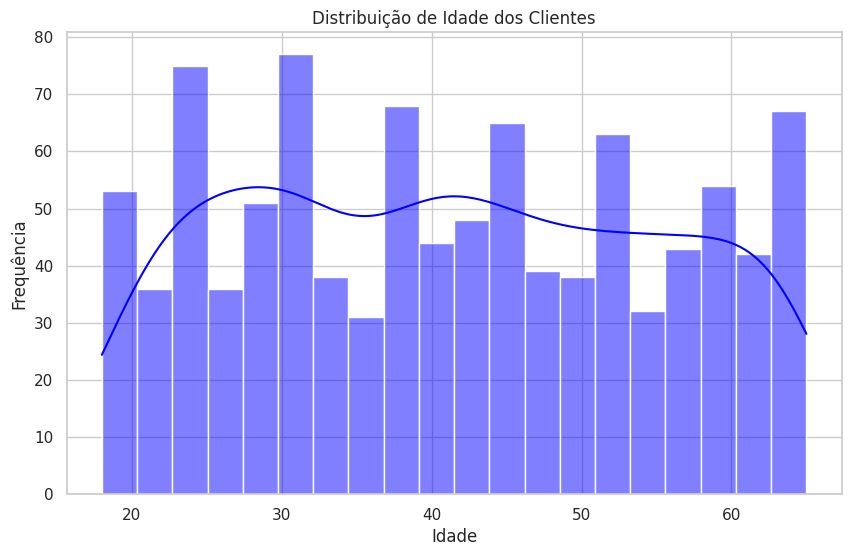

<ipython-input-1-72d0ad684488>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='genero', palette='pastel')


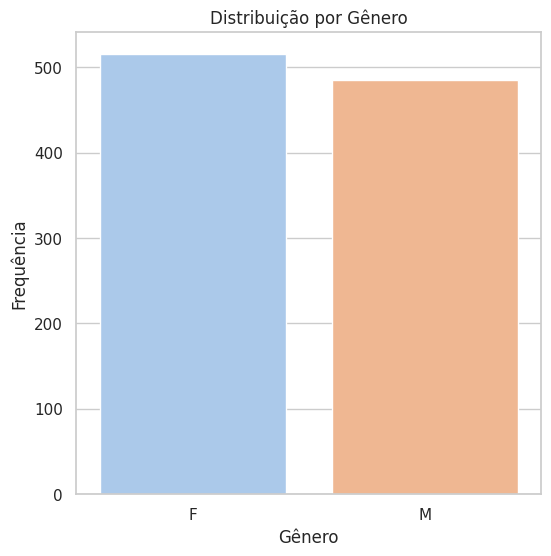

<ipython-input-1-72d0ad684488>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, y='cidade', order=dados['cidade'].value_counts().index, palette='coolwarm')


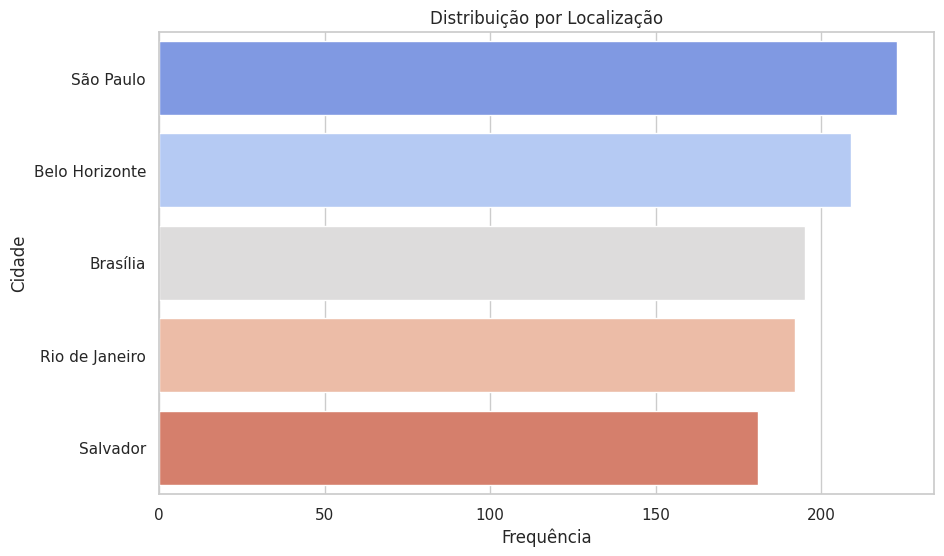

<ipython-input-1-72d0ad684488>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, y='categoria', order=dados['categoria'].value_counts().index, palette='viridis')


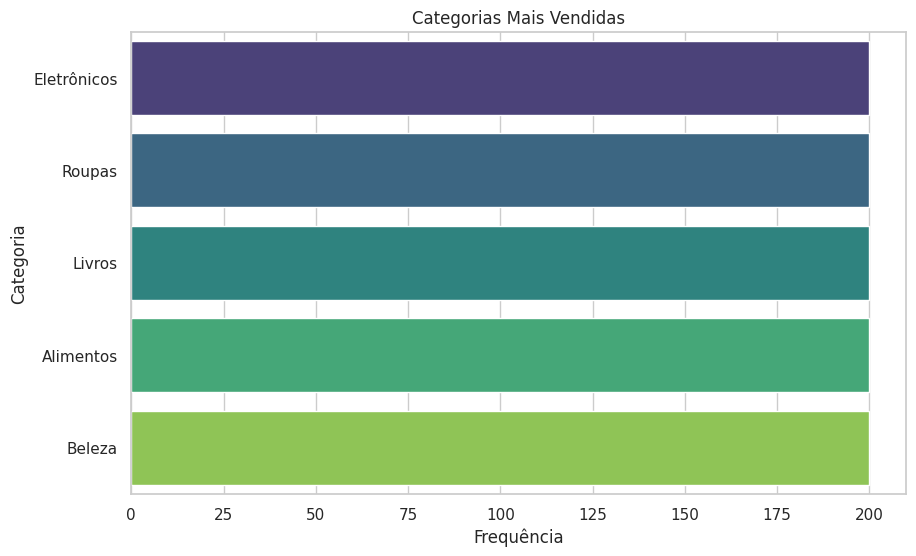

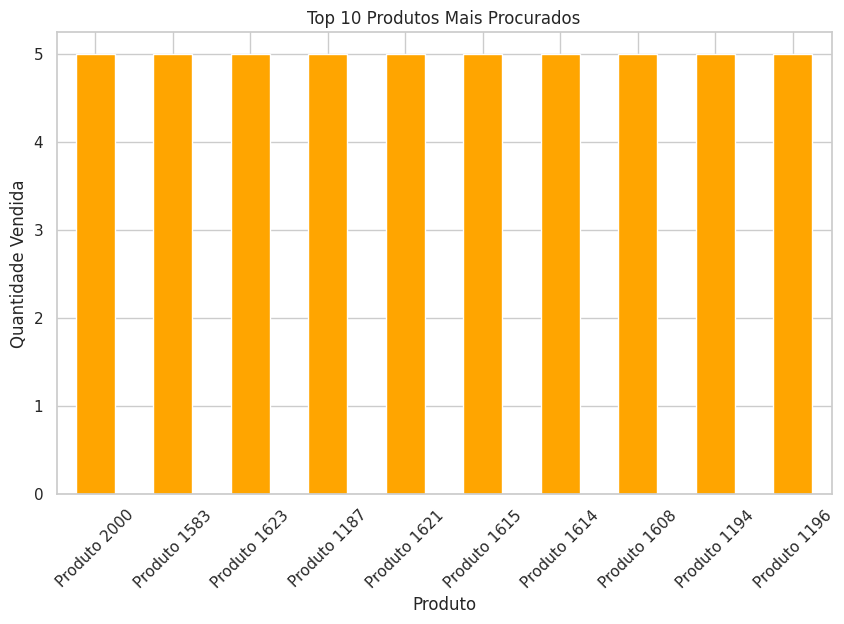

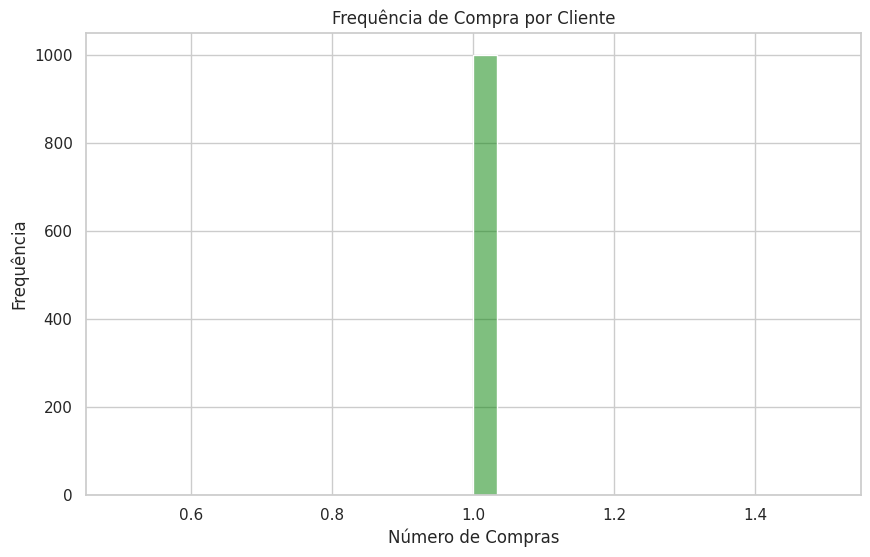

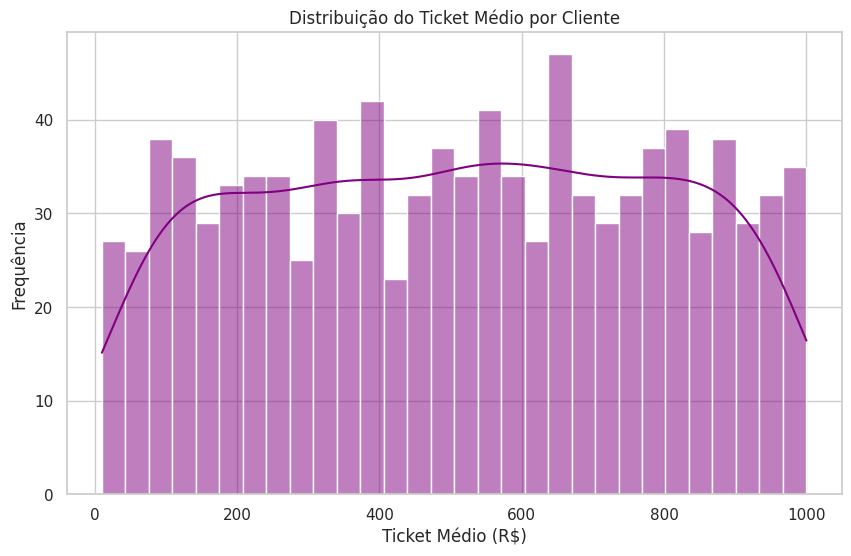

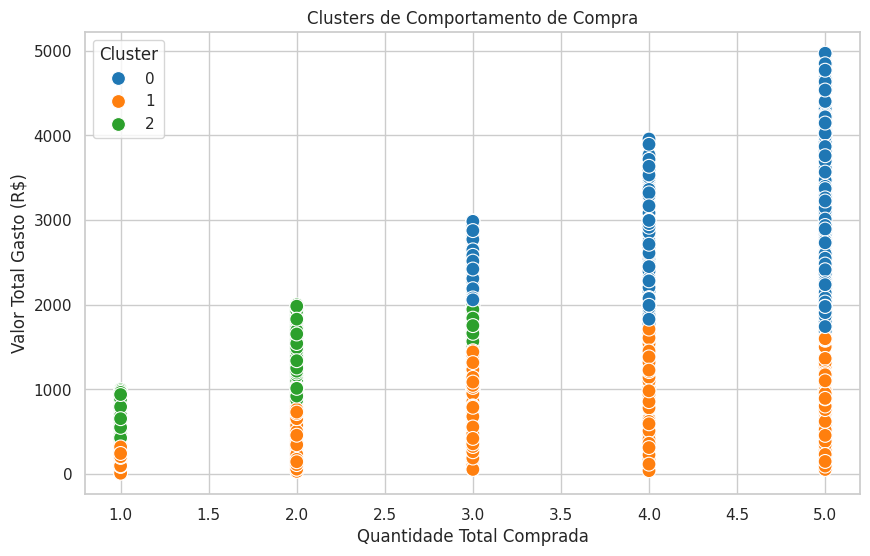

,quantidade,valor_total,ticket_medio
cluster,,,
0,4.273810,2947.391117,702.104004
1,2.897172,622.825572,217.739332
2,1.683636,1154.217437,694.293002


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random
import datetime

# Funções auxiliares para criar dados fictícios
def gerar_nome():
    nomes = ['Ana', 'João', 'Maria', 'Pedro', 'Carlos', 'Fernanda', 'Luiz', 'Juliana']
    sobrenomes = ['Silva', 'Santos', 'Souza', 'Oliveira', 'Pereira', 'Rodrigues']
    return random.choice(nomes) + ' ' + random.choice(sobrenomes)

def gerar_data_nascimento():
    return datetime.date(random.randint(1950, 2005), random.randint(1, 12), random.randint(1, 28))

def gerar_cidade():
    cidades = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Brasília']
    return random.choice(cidades)

# Criando os dados fictícios para o e-commerce
dados = {
    'cliente_id': range(1, 1001),
    'nome': [gerar_nome() for _ in range(1000)],
    'idade': [random.randint(18, 65) for _ in range(1000)],
    'genero': [random.choice(['M', 'F']) for _ in range(1000)],
    'cidade': [gerar_cidade() for _ in range(1000)],
    'produto_id': range(1001, 2001),
    'nome_produto': ['Produto ' + str(i) for i in range(1001, 2001)],
    'categoria': ['Eletrônicos', 'Roupas', 'Livros', 'Alimentos', 'Beleza'] * 200,
    'preco': [random.uniform(10, 1000) for _ in range(1000)],
    'data_compra': [datetime.date(2023, random.randint(1, 12), random.randint(1, 28)) for _ in range(1000)],
    'quantidade': [random.randint(1, 5) for _ in range(1000)]
}
dados['valor_total'] = [preco * quantidade for preco, quantidade in zip(dados['preco'], dados['quantidade'])]

# Criando o DataFrame e salvando em CSV
df = pd.DataFrame(dados)
df.to_csv('dados_ecommerce_teste.csv', index=False)

# Configurando visualizações
sns.set(style="whitegrid")

# Carregando os dados
dados = pd.read_csv('dados_ecommerce_teste.csv')

# Visualizando as primeiras linhas do DataFrame
display(dados.head())

# 1. Perfil do cliente
# Distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(dados['idade'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Distribuição por gênero
plt.figure(figsize=(6, 6))
sns.countplot(data=dados, x='genero', palette='pastel')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

# Distribuição por localização
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, y='cidade', order=dados['cidade'].value_counts().index, palette='coolwarm')
plt.title('Distribuição por Localização')
plt.xlabel('Frequência')
plt.ylabel('Cidade')
plt.show()

# 2. Produtos mais populares
# Categorias mais vendidas
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, y='categoria', order=dados['categoria'].value_counts().index, palette='viridis')
plt.title('Categorias Mais Vendidas')
plt.xlabel('Frequência')
plt.ylabel('Categoria')
plt.show()

# Produtos mais procurados
produtos_populares = dados.groupby('nome_produto')['quantidade'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
produtos_populares.plot(kind='bar', color='orange')
plt.title('Top 10 Produtos Mais Procurados')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

# 3. Comportamento de compra
# Frequência de compra por cliente
compras_por_cliente = dados.groupby('cliente_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(compras_por_cliente, bins=30, kde=True, color='green')
plt.title('Frequência de Compra por Cliente')
plt.xlabel('Número de Compras')
plt.ylabel('Frequência')
plt.show()

# Ticket médio por cliente
dados['ticket_medio'] = dados['valor_total'] / dados['quantidade']
ticket_medio = dados.groupby('cliente_id')['ticket_medio'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(ticket_medio, bins=30, kde=True, color='purple')
plt.title('Distribuição do Ticket Médio por Cliente')
plt.xlabel('Ticket Médio (R$)')
plt.ylabel('Frequência')
plt.show()

# 4. Identificando padrões de compra (Clustering)
# Criando uma matriz de características
caracteristicas = dados.groupby('cliente_id').agg({
    'quantidade': 'sum',
    'valor_total': 'sum',
    'ticket_medio': 'mean'
})

# Normalizando os dados
scaler = StandardScaler()
caracteristicas_normalizadas = scaler.fit_transform(caracteristicas)

# Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
caracteristicas['cluster'] = kmeans.fit_predict(caracteristicas_normalizadas)

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=caracteristicas['quantidade'],
    y=caracteristicas['valor_total'],
    hue=caracteristicas['cluster'],
    palette='tab10',
    s=100
)
plt.title('Clusters de Comportamento de Compra')
plt.xlabel('Quantidade Total Comprada')
plt.ylabel('Valor Total Gasto (R$)')
plt.legend(title='Cluster')
plt.show()

# 5. Conclusões e insights
# Visualizações e métricas adicionais
# Gerando um resumo estatístico para clusters
cluster_summary = caracteristicas.groupby('cluster').agg({
    'quantidade': 'mean',
    'valor_total': 'mean',
    'ticket_medio': 'mean'
})
display(cluster_summary)
